In [203]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [204]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [205]:
# Cambiamos las columnas de fecha registro y fecha venta a tipo datetime.
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [206]:
# Dividimos la columna de fecha venta en tres nuevas columnas, según el día, mes y año. 
for col in ['fecha_venta']:
    df_bmw[col + '_MES'] = df_bmw[col].dt.month
    df_bmw[col + '_AÑO'] = df_bmw[col].dt.year
        

df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_venta_MES,fecha_venta_AÑO
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,1.0,2018.0
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,2.0,2018.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2.0,2018.0
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,2.0,2018.0
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.0,2018.0


In [207]:
# Eliminamos la columna fecha venta. 
df_bmw.drop('fecha_venta',axis=1,inplace=True)

In [208]:
# Eliminamos la columna de marca, ya que no nos aporta mucha información.
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,1.0,2018.0
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2.0,2018.0
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2.0,2018.0
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2.0,2018.0
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,4.0,2018.0


In [209]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['modelo', 'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta_MES','fecha_venta_AÑO']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

df2_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [210]:
df3_bmw = df2_bmw.copy()

<Axes: >

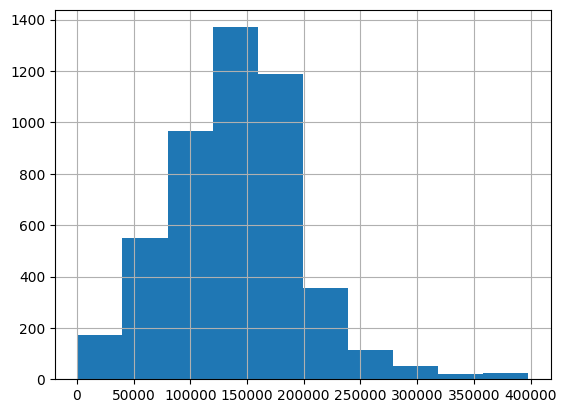

In [211]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

df3_bmw['km'].hist()

In [212]:
df4_bmw = df3_bmw.copy()

<Axes: >

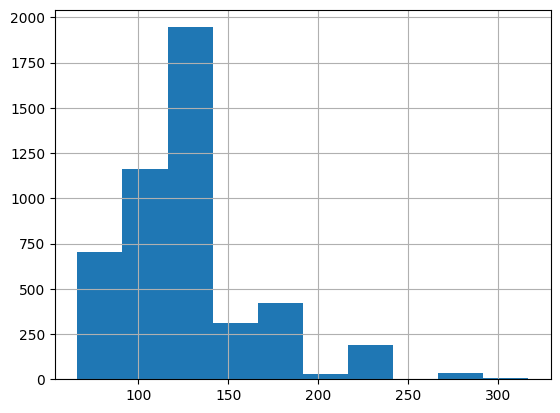

In [213]:
# Quitamos los outliers de la columna 'potencia'. 
df4_bmw.drop(df4_bmw[((df4_bmw["potencia"]<=50) | (df4_bmw["potencia"]>=400))].index, inplace=True)

df4_bmw['potencia'].hist()

<Axes: >

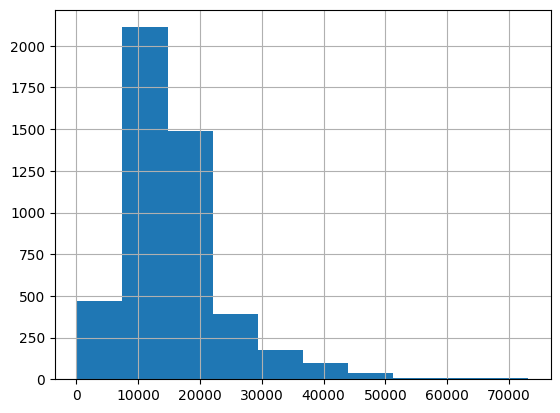

In [214]:
# Quitamos los outliers de la columna 'precio'. 
df4_bmw.drop(df4_bmw[((df4_bmw["precio"]<=100) | (df4_bmw["precio"]>=75000))].index, inplace=True)

df4_bmw['precio'].hist()

In [215]:
# Eliminamos la columna de fecha registro, ya que tenemos el 50 % de valores nulos. 
df4_bmw.drop('fecha_registro',axis=1,inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           441
tipo_coche                     1443
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3357
elevalunas_electrico              0
bluetooth                       721
gps                               0
alerta_lim_velocidad            721
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [216]:
# Cambiamos los valores nulos de las columnas de color y tipo coche, por 'sin especificar'.
df4_bmw["color"].fillna("sin especificar", inplace=True)
df4_bmw["tipo_coche"].fillna('sin especificar', inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3357
elevalunas_electrico              0
bluetooth                       721
gps                               0
alerta_lim_velocidad            721
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [217]:
df5_bmw = df4_bmw.copy()

In [218]:
# Guardamos el dataframe en un pickle para así poder seguir el día siguiente sin tener que ejecutar todo. 
pd.to_pickle(df5_bmw,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/practica_entregable_Simeon_Mitev_PK")

In [219]:
# Ejecutamos el pickle y creamos una nueva variable. 
df_bmw_rec=pd.read_pickle("practica_entregable_Simeon_Mitev_PK")

In [220]:
# Eliminamos la columna de asientos traseros plegables ya que tiene más valores nulos que valores con información. 
df_bmw_rec.drop('asientos_traseros_plegables',axis=1,inplace=True)

In [221]:
# PRIMERA VISUALIZACIÓN DE CORRELACIONES ENTRE COLUMNAS 
corr = df_bmw_rec.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio,fecha_venta_MES,fecha_venta_AÑO
km,1.000000,-0.040468,0.160938,-0.428702,-0.001070,-0.033889
potencia,-0.040468,1.000000,0.006246,0.676501,-0.031700,-0.001774
gps,0.160938,0.006246,1.000000,0.006928,0.063020,-0.007658
precio,-0.428702,0.676501,0.006928,1.000000,0.004140,0.014876
fecha_venta_MES,-0.001070,-0.031700,0.063020,0.004140,1.000000,-0.009965
fecha_venta_AÑO,-0.033889,-0.001774,-0.007658,0.014876,-0.009965,1.000000


In [222]:
target= ["PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [223]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw_rec)

In [224]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [225]:
lista_numericas

['km', 'potencia', 'precio', 'fecha_venta_MES', 'fecha_venta_AÑO']

In [226]:
lista_boolean

[]

In [227]:
# Sustituyo los valores nulos de estas columnas por su mediana.
df_bmw_rec["aire_acondicionado"].fillna(df_bmw_rec["aire_acondicionado"].median(),inplace=True)
df_bmw_rec["bluetooth"].fillna(df_bmw_rec["bluetooth"].median(),inplace=True)
df_bmw_rec["alerta_lim_velocidad"].fillna(df_bmw_rec["alerta_lim_velocidad"].median(),inplace=True)


In [228]:
# Eliminamos los valores más pequeños para la columna tipo gasolina.
valores_a_eliminar = ['Diesel', 'hybrid_petrol', 'electro']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['tipo_gasolina'].isin(valores_a_eliminar)]
df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)

print(df_bmw_rec["tipo_gasolina"].value_counts())

tipo_gasolina
diesel    4595
petrol     189
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_20412\4190776265.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)


In [229]:
# Eliminamos los valores más pequeños para la columna colores.
valores_a_eliminar_colores = ['orange', 'green', 'beige','red']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['color'].isin(valores_a_eliminar_colores)]
df_bmw_rec['color'].replace(valores_a_eliminar_colores, inplace=True)

print(df_bmw_rec["color"].value_counts())

color
black              1480
grey               1057
blue                637
white               477
sin especificar     441
brown               301
silver              288
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_20412\3988015735.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['color'].replace(valores_a_eliminar_colores, inplace=True)


In [230]:
# Eliminamos los valores más pequeños para la columna tipo_coche.
valores_a_eliminar_tipo_coche = ['van', 'convertible', 'coupe','subcompact']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['tipo_coche'].isin(valores_a_eliminar_tipo_coche)]
df_bmw_rec['tipo_coche'].replace(valores_a_eliminar_tipo_coche, inplace=True)

print(df_bmw_rec["tipo_coche"].value_counts())

tipo_coche
sin especificar    1405
estate             1074
sedan               800
suv                 729
hatchback           473
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_20412\4094596672.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['tipo_coche'].replace(valores_a_eliminar_tipo_coche, inplace=True)


modelo 
 modelo
320    710
520    624
318    542
X3     420
116    297
      ... 
Z4       1
430      1
735      1
M4       1
650      1
Name: count, Length: 61, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel    4335
petrol     146
Name: count, dtype: int64 

color 
 color
black              1426
grey               1010
blue                600
white               452
sin especificar     420
brown               298
silver              275
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
sin especificar    1405
estate             1074
sedan               800
suv                 729
hatchback           473
Name: count, dtype: int64 

volante_regulable 
 volante_regulable
True     2499
False    1982
Name: count, dtype: int64 

aire_acondicionado 
 aire_acondicionado
True     3704
False     777
Name: count, dtype: int64 

camara_trasera 
 camara_trasera
False    3559
True      922
Name: count, dtype: int64 


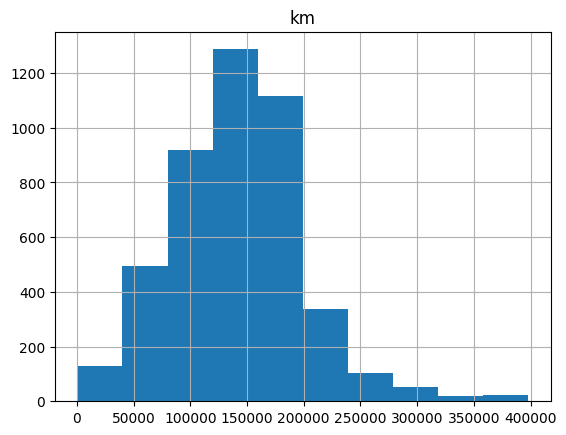

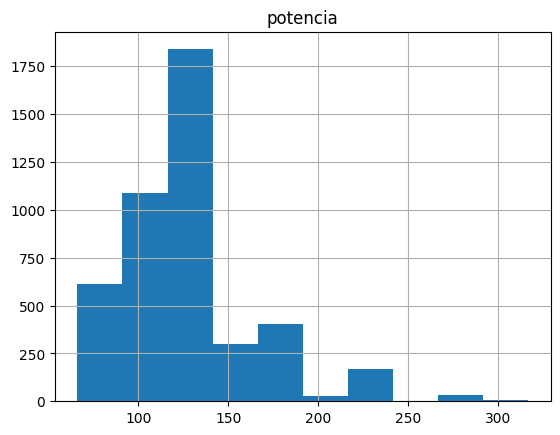

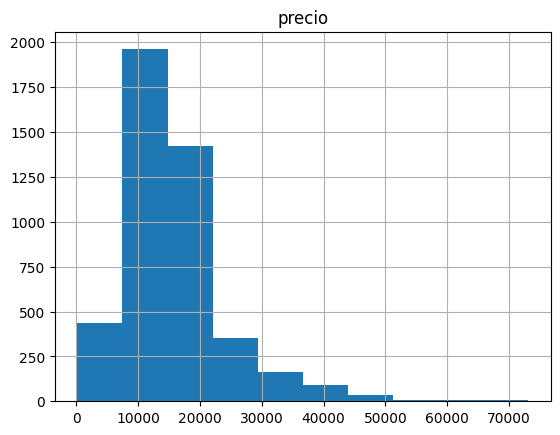

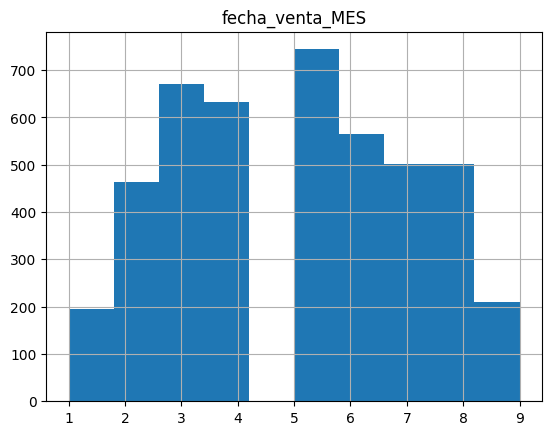

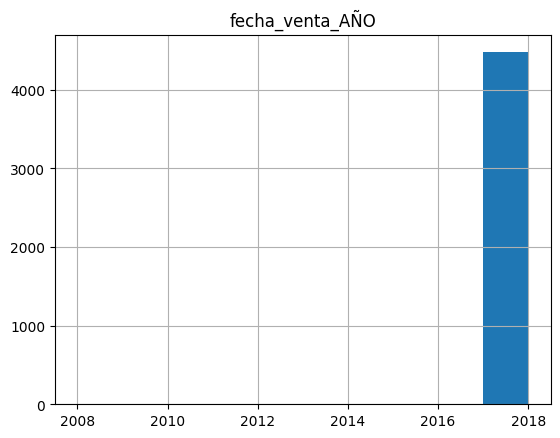

In [231]:
# Bucle para ver en general las columnas. 
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind == "O") or (df_bmw_rec[i].dtype.kind == "B"):
    print(i,'\n', df_bmw_rec[i].value_counts(), '\n')
  elif (df_bmw_rec[i].dtype.kind=="f") or (df_bmw_rec[i].dtype.kind=="i"):
    print(df_bmw_rec.hist(i))

In [232]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind =="i"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw_rec)    

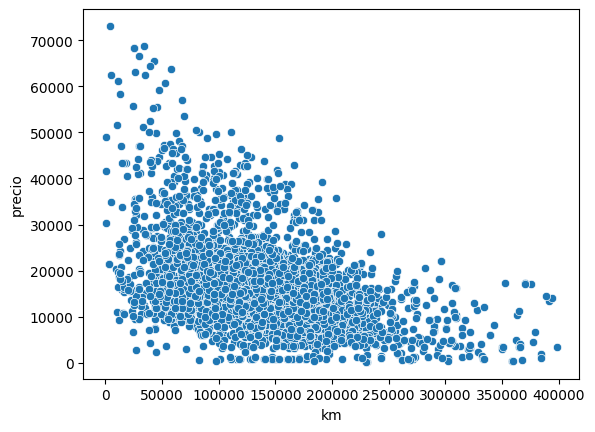

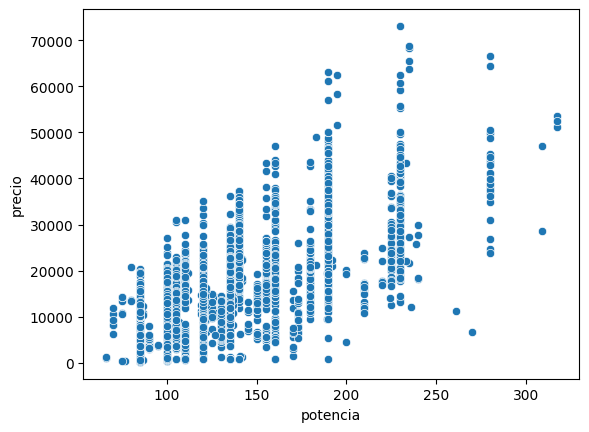

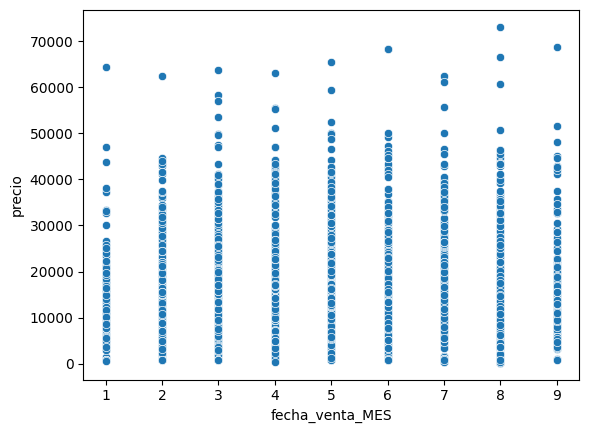

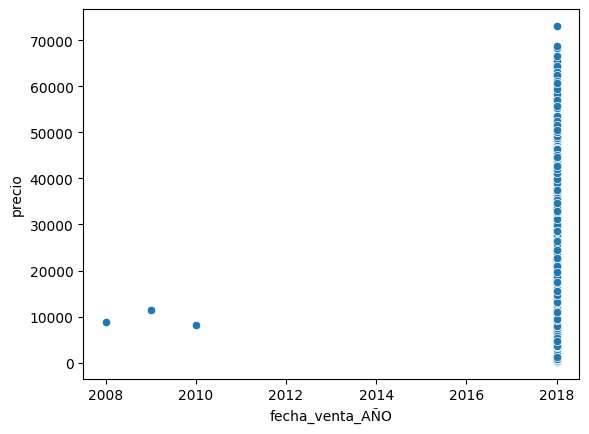

In [233]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw_rec)   

In [234]:
df_bmw_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4481 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4481 non-null   object 
 1   km                    4481 non-null   float64
 2   potencia              4481 non-null   float64
 3   tipo_gasolina         4481 non-null   object 
 4   color                 4481 non-null   object 
 5   tipo_coche            4481 non-null   object 
 6   volante_regulable     4481 non-null   object 
 7   aire_acondicionado    4481 non-null   object 
 8   camara_trasera        4481 non-null   object 
 9   elevalunas_electrico  4481 non-null   object 
 10  bluetooth             4481 non-null   object 
 11  gps                   4481 non-null   bool   
 12  alerta_lim_velocidad  4481 non-null   object 
 13  precio                4481 non-null   float64
 14  fecha_venta_MES       4481 non-null   float64
 15  fecha_venta_AÑO       4481